In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB

In [16]:
data=pd.read_csv('SalaryData_Train(1).csv')
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# performing the basic EDA on the data set

# #converting the following data into the numerical data types using the label encoder

In [17]:
label=preprocessing.LabelEncoder()
data['Salary']=label.fit_transform(data.Salary)
data['workclass']=label.fit_transform(data.workclass)
data['education']=label.fit_transform(data.education)
data['maritalstatus']=label.fit_transform(data.maritalstatus)
data['occupation']=label.fit_transform(data.occupation)
data['relationship']=label.fit_transform(data.relationship)
data['race']=label.fit_transform(data.race )
data['sex']=label.fit_transform(data.sex)
data['native']=label.fit_transform(data.native)
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [18]:
data=data.drop(['educationno'],axis=1)# here i am deleting the column of the educationno

In [19]:
data.nunique() # in order to find the no of unique values present in the data set 

age               72
workclass          7
education         16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [20]:
data.isna().sum()# so there are no null values in the data set

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   maritalstatus  30161 non-null  int32
 4   occupation     30161 non-null  int32
 5   relationship   30161 non-null  int32
 6   race           30161 non-null  int32
 7   sex            30161 non-null  int32
 8   capitalgain    30161 non-null  int64
 9   capitalloss    30161 non-null  int64
 10  hoursperweek   30161 non-null  int64
 11  native         30161 non-null  int32
 12  Salary         30161 non-null  int32
dtypes: int32(9), int64(4)
memory usage: 2.0 MB


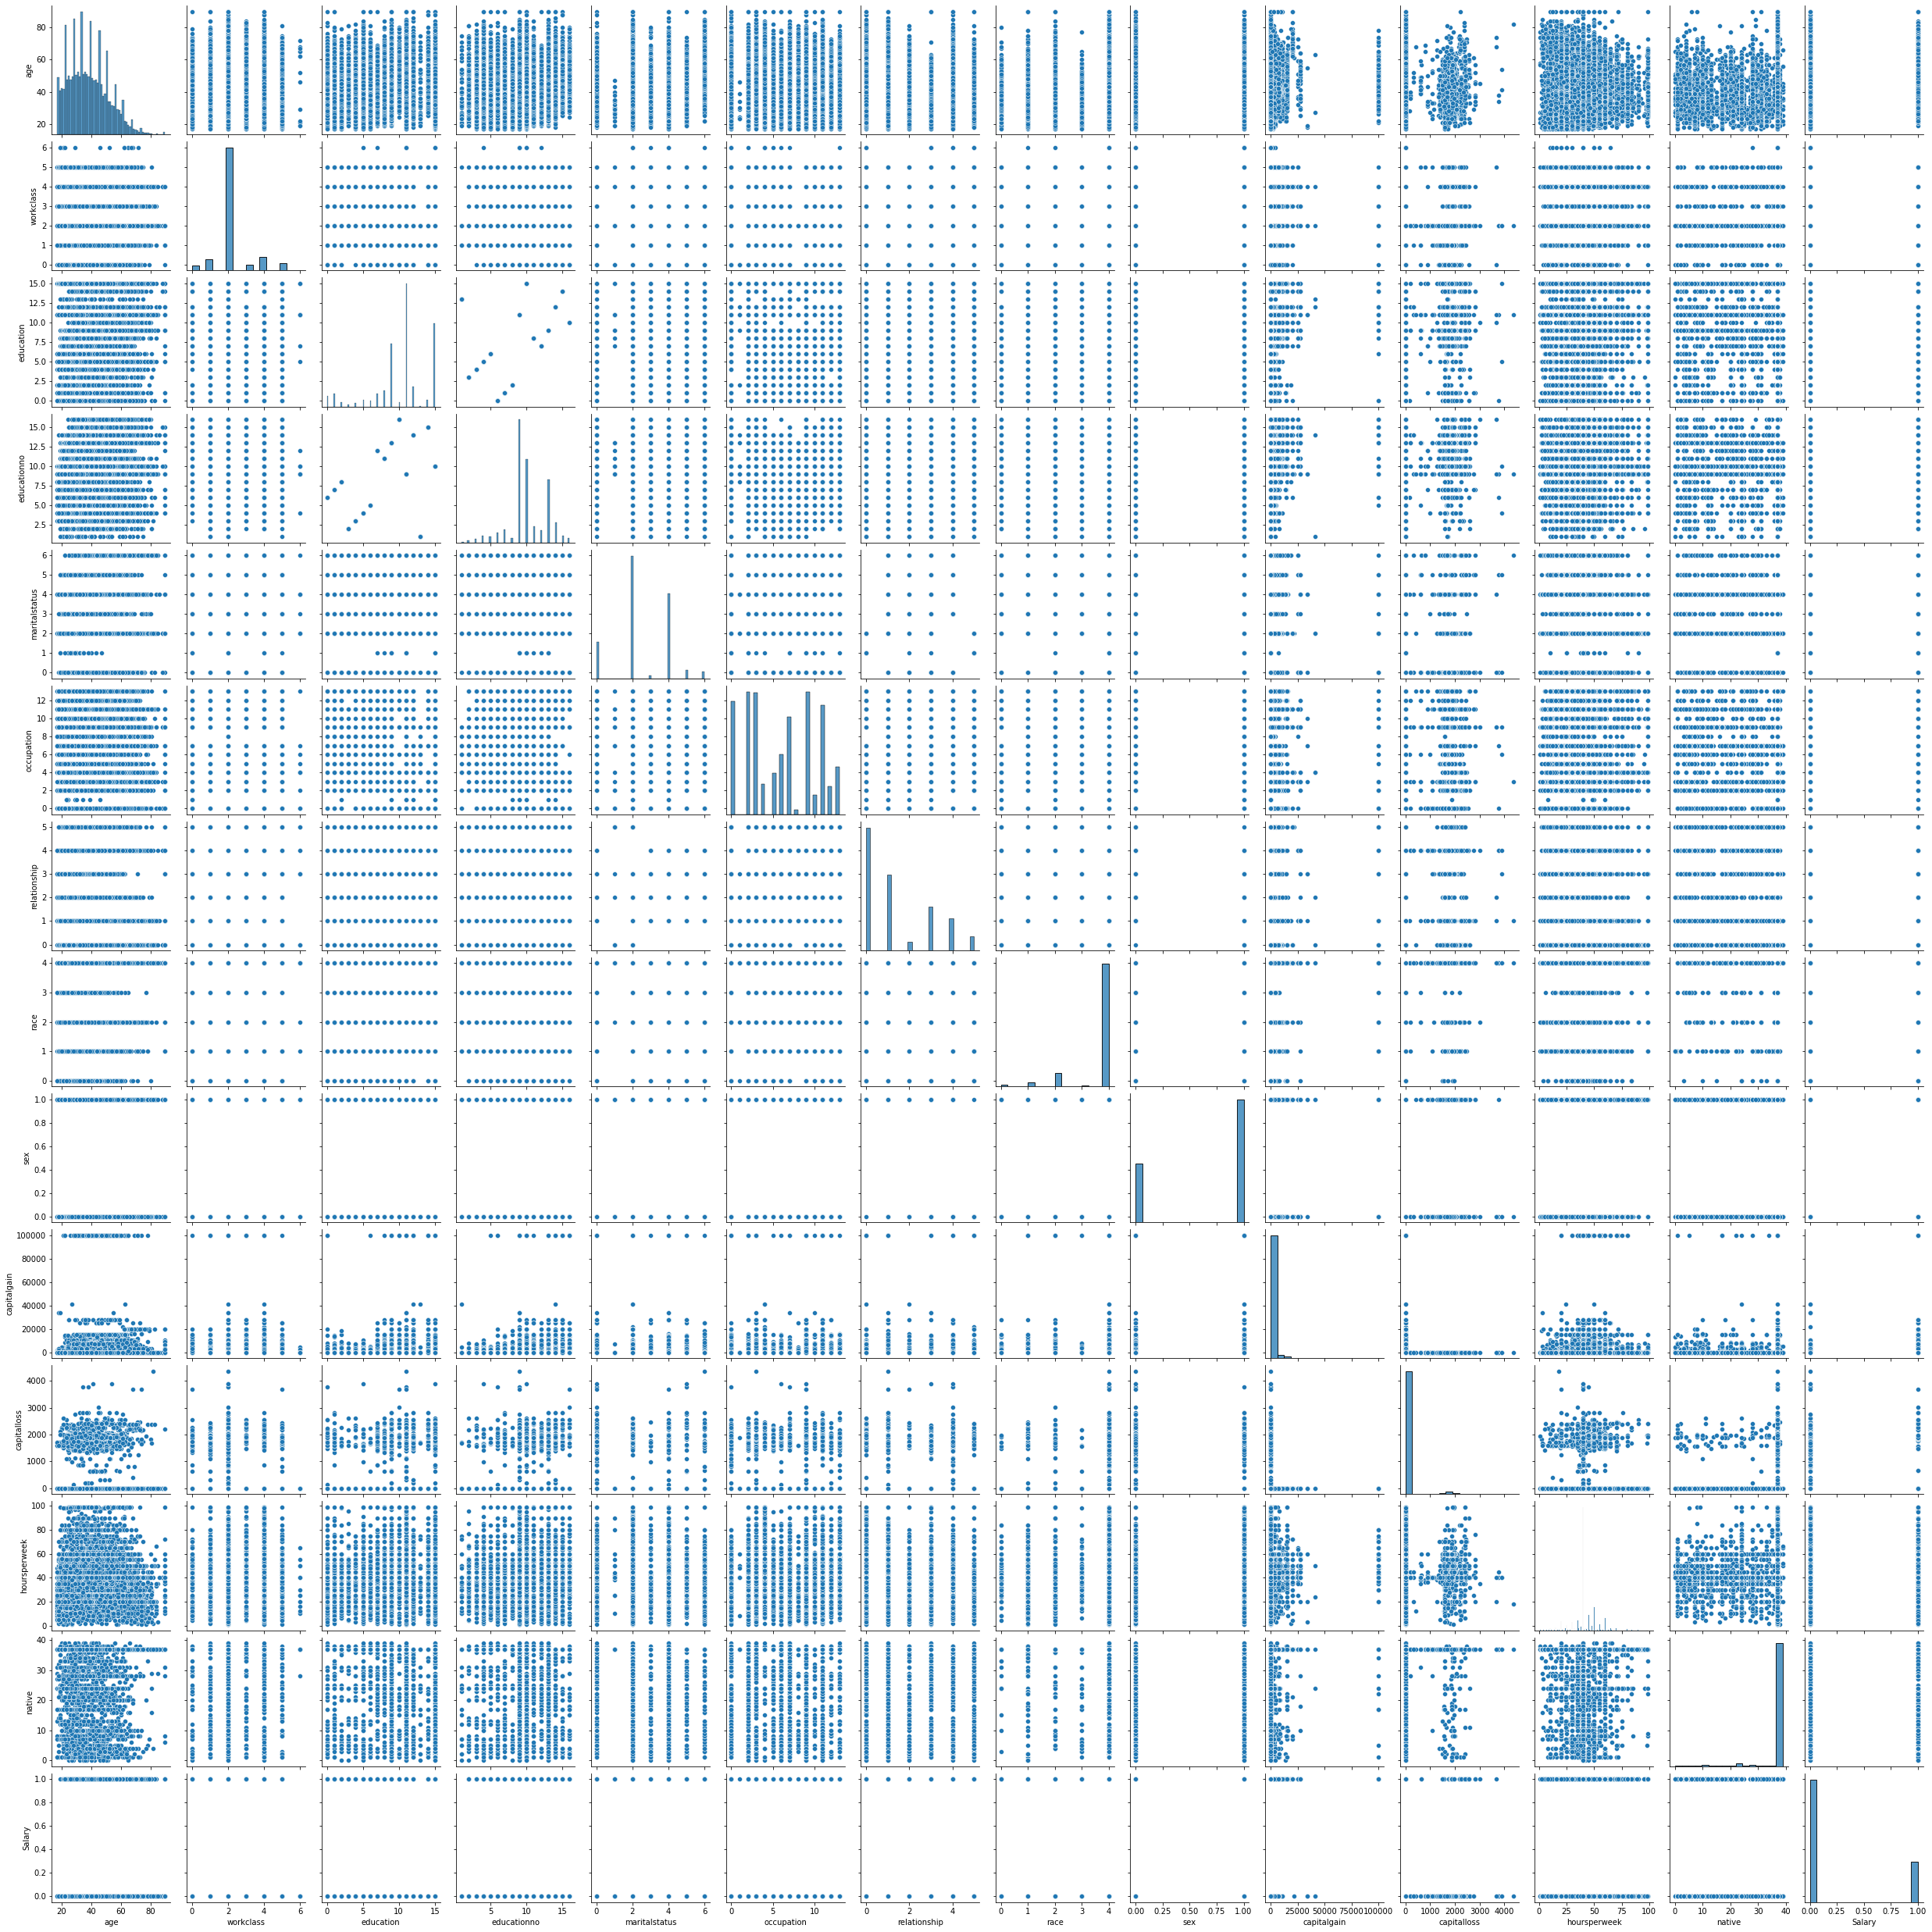

In [11]:
sns.pairplot(data)

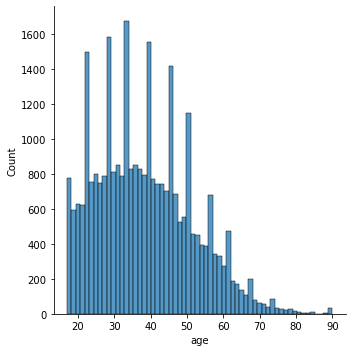

In [22]:
sns.displot(data.age)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

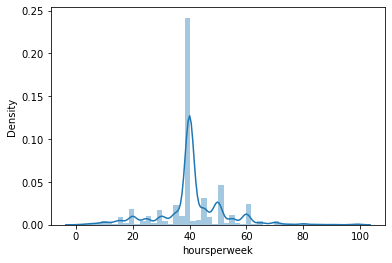

In [23]:
sns.distplot(data.hoursperweek)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

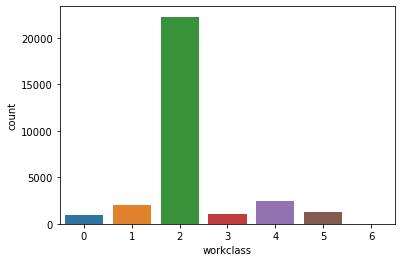

In [24]:
sns.countplot(data.workclass)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

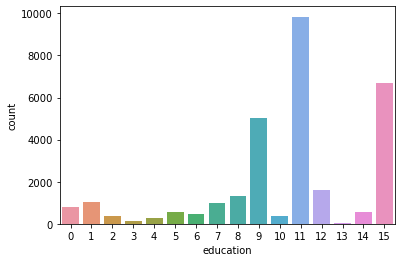

In [25]:
sns.countplot(data.education)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

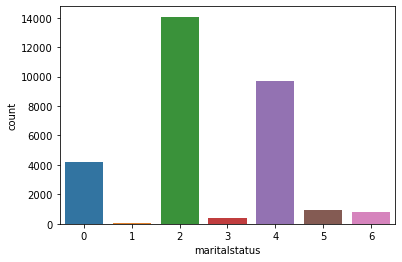

In [26]:
sns.countplot(data.maritalstatus)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

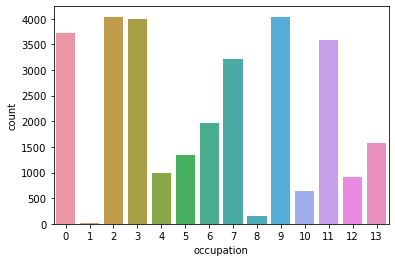

In [27]:
sns.countplot(data.occupation)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

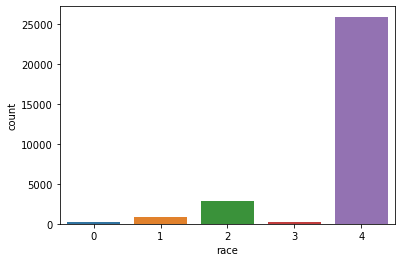

In [28]:
sns.countplot(data.race)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

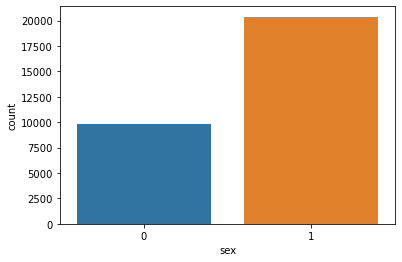

In [29]:
sns.countplot(data.sex)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship', ylabel='count'>

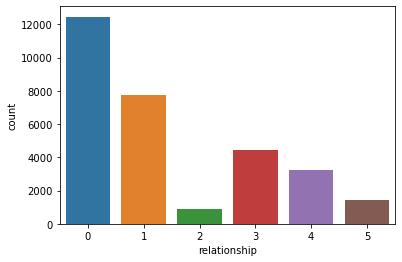

In [30]:
sns.countplot(data.relationship)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

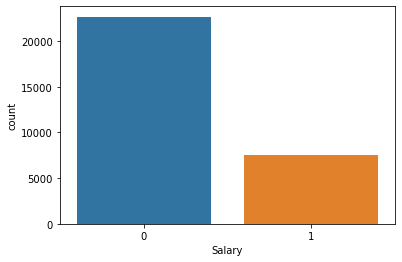

In [31]:
sns.countplot(data.Salary)

# checking for the outliers in the dataset using boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x160185bd160>,
 'caps': [<matplotlib.lines.Line2D at 0x160185c0460>,
 'boxes': [<matplotlib.lines.Line2D at 0x160185bd610>],
 'medians': [<matplotlib.lines.Line2D at 0x160185c8430>],
 'fliers': [<matplotlib.lines.Line2D at 0x160185cc910>],
 'means': []}

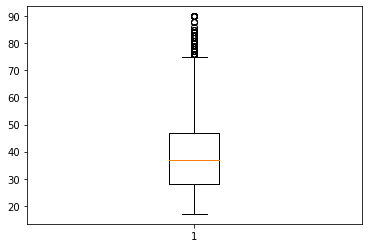

In [32]:
plt.boxplot(data.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x16014541d00>,
 'caps': [<matplotlib.lines.Line2D at 0x16014541940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1601454a6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x16018ea82e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16018e22940>],
 'means': []}

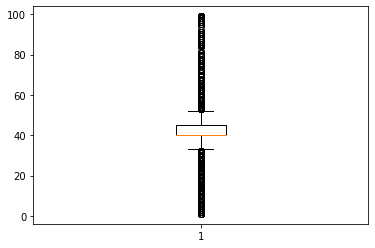

In [33]:
plt.boxplot(data.hoursperweek)

In [34]:
x=data.iloc[:,0:-1]
x 

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,4,0,1,4,1,2174,0,40,37
1,50,4,9,2,3,0,4,1,0,0,13,37
2,38,2,11,0,5,1,4,1,0,0,40,37
3,53,2,1,2,5,0,2,1,0,0,40,37
4,28,2,9,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37
30157,40,2,11,2,6,0,4,1,0,0,40,37
30158,58,2,11,6,0,4,4,0,0,0,40,37
30159,22,2,11,4,0,3,4,1,0,0,20,37


In [35]:
y=data.iloc[:,-1]
y 

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

# Building the model of the Naive Bayes

In [37]:
model=MultinomialNB()

In [38]:
model.fit(x,y)

MultinomialNB()

# here i have developed the model of the naive Bayes and testing the model on the test dataset

In [39]:
data_test=pd.read_csv('SalaryData_Test(1).csv')
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [40]:
label=preprocessing.LabelEncoder()
data_test['Salary']=label.fit_transform(data_test.Salary)
data_test['workclass']=label.fit_transform(data_test.workclass)
data_test['education']=label.fit_transform(data_test.education)
data_test['maritalstatus']=label.fit_transform(data_test.maritalstatus)
data_test['occupation']=label.fit_transform(data_test.occupation)
data_test['relationship']=label.fit_transform(data_test.relationship)
data_test['race']=label.fit_transform(data_test.race )
data_test['sex']=label.fit_transform(data_test.sex)
data_test['native']=label.fit_transform(data_test.native)
data_test=data_test.drop(['educationno'],axis=1)# here i am deleting the column of the educationno
data_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,0,0,40,37,0
1,38,2,11,2,4,0,4,1,0,0,50,37,0
2,28,1,7,2,10,0,4,1,0,0,40,37,1
3,44,2,15,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,0,0,3,1,1,5455,0,40,37,0


In [41]:
x_test=data_test.iloc[:,0:-1]
x_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,4,6,3,2,1,0,0,40,37
1,38,2,11,2,4,0,4,1,0,0,50,37
2,28,1,7,2,10,0,4,1,0,0,40,37
3,44,2,15,2,6,0,2,1,7688,0,40,37
4,34,2,0,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37
15056,39,2,9,0,9,1,4,0,0,0,36,37
15057,38,2,9,2,9,0,4,1,0,0,50,37
15058,44,2,9,0,0,3,1,1,5455,0,40,37


In [42]:
y_test=data_test.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [43]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060

